In [1]:
## Import the Required Libraries
import pandas as pd
import numpy as np
import string


## for graphs / visualization
import matplotlib.pyplot as plt
#import seaborn as sns

## ignore warnings
import warnings
warnings.filterwarnings("ignore")

## regular expression library
import re

In [2]:
## Load datasets

df = pd.read_csv('amazon_baby_products/amazon_baby.csv')
df.head(20)

,name,review,rating
0,Planetwise Flannel Wipes,"These flannel wipes are OK, but in my opinion ...",3
1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5
2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,5
3,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,5
4,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5
5,Stop Pacifier Sucking without tears with Thumb...,"When the Binky Fairy came to our house, we did...",5
6,A Tale of Baby's Days with Peter Rabbit,"Lovely book, it's bound tightly so you may not...",4
7,"Baby Tracker&reg; - Daily Childcare Journal, S...",Perfect for new parents. We were able to keep ...,5
8,"Baby Tracker&reg; - Daily Childcare Journal, S...",A friend of mine pinned this product on Pinter...,5
9,"Baby Tracker&reg; - Daily Childcare Journal, S...",This has been an easy way for my nanny to reco...,4


**number of unique product names**

In [3]:
len(df.name.unique())

32418

**total number of reviews / comments for all products**

In [4]:
len(df)

183531

## Data Cleaning and Preparation

#### Check if null values present in any of the columns

In [5]:
df.isnull().any()

name       True
review     True
rating    False
dtype: bool

#### count the number of null values in each of the columns

In [6]:
df.isnull().sum()

name      318
review    829
rating      0
dtype: int64

### drop null records since null product names or review comments won't be useful. Also those can't be replaced with any meaningful defaults

In [7]:
df.dropna(inplace=True)

In [8]:
## display data types for each column

df.dtypes

name      object
review    object
rating     int64
dtype: object

### cleanup product names and review comments by deleting special characters

In [9]:
df['name'] = df['name'].apply(lambda x : re.sub('[^a-zA-Z0-9 \n\.]', '', x))

In [10]:
df['review'] = df['review'].apply(lambda x : re.sub('[^a-zA-Z0-9 \n\.]', '', x))

In [11]:
## Another method to delete the special characters

## df['review'] = df['review'].apply(lambda x: re.sub(r'[~%"\'@^?$.}+*#<{>,|!/]', r'', x))

### convert all the reviews in lower case as a part of data preparation for sentiment analysis. This will help ensure all the unique words are counted appropriately, irrespective of the Upper casing / lower casing

In [12]:
df['review'] = df['review'].apply(lambda x : x.lower())

In [13]:
## Another method to convert the reviews texts to all lower cases

## df['review'] = df['review'].str.lower()

In [14]:
## create the sentiments columns with appropriate values based on ratings
## ratings 4 & 5 : 'positive'
## ratings 3     : 'neutral'
## ratings 2 & 1 : 'negative'

## lambda function to convert ratings into sentiments
sentiment_tags = lambda x : 'positive' if x>=4 else ('neutral' if x==3 else 'negative')

## apply the sentiment_tags function on 'rating' column and store the values in new column 'sentiment'
df['sentiment'] = df['rating'].apply(sentiment_tags)

In [15]:
df.head()

,name,review,rating,sentiment
0,Planetwise Flannel Wipes,these flannel wipes are ok but in my opinion n...,3,neutral
1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5,positive
2,Annas Dream Full Quilt with 2 Shams,very soft and comfortable and warmer than it l...,5,positive
3,Stop Pacifier Sucking without tears with Thumb...,this is a product well worth the purchase. i ...,5,positive
4,Stop Pacifier Sucking without tears with Thumb...,all of my kids have cried nonstop when i tried...,5,positive


**total number of reviews / comments for all products after null values cleaning**

In [16]:
len(df)

182384

**number of unique product names after null values cleaning**

In [17]:
## unique products after data cleaning
len(df.name.unique())

32305

## Exploratory Data Analysis

#### create a temporary dataframe after dropping 'rating' column so that reviews by product can be easily counted

In [18]:
temp_df_rev = df.drop(columns=['rating', 'sentiment'])
temp_df_rev.head()

,name,review
0,Planetwise Flannel Wipes,these flannel wipes are ok but in my opinion n...
1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...
2,Annas Dream Full Quilt with 2 Shams,very soft and comfortable and warmer than it l...
3,Stop Pacifier Sucking without tears with Thumb...,this is a product well worth the purchase. i ...
4,Stop Pacifier Sucking without tears with Thumb...,all of my kids have cried nonstop when i tried...


In [19]:
## count the number of review comments by each product name
test_df_rev = temp_df_rev.groupby(['name']).count().sort_values('review', ascending=False)

In [20]:
## Top 20 products by review comments counts
test_df_rev.head(20)

,review
name,
Vulli Sophie the Giraffe Teether,779
Simple Wishes HandsFree Breastpump Bra Pink XSL,560
Infant Optics DXR5 2.4 GHz Digital Video Baby Monitor with Night Vision,558
Baby Einstein Take Along Tunes,545
Cloud b Twilight Constellation Night Light Turtle,517
FisherPrice Booster Seat BlueGreenGray,487
FisherPrice Rainforest Jumperoo,446
Graco Nautilus 3in1 Car Seat Matrix,418
Leachco Snoogle Total Body Pillow,388


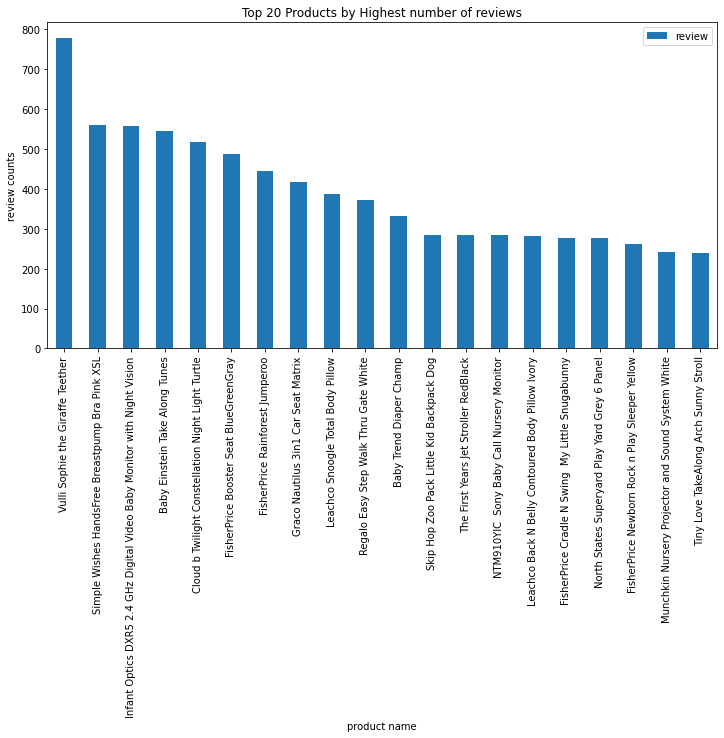

In [21]:
## top 20 products by highest number of reviews

test_df_rev[0:20].plot(kind='bar', figsize=(12, 6))
plt.xlabel('product name')
plt.ylabel('review counts')
plt.title('Top 20 Products by Highest number of reviews')
plt.show()

In [22]:
## create a temporary dataframe after dropping 'review' column so that reviews by product can be easily counted
temp_df_rating = df.drop(columns=['review', 'sentiment'])
temp_df_rating.head()

,name,rating
0,Planetwise Flannel Wipes,3
1,Planetwise Wipe Pouch,5
2,Annas Dream Full Quilt with 2 Shams,5
3,Stop Pacifier Sucking without tears with Thumb...,5
4,Stop Pacifier Sucking without tears with Thumb...,5


In [23]:
## create temporary dataframe consisting of only ratings

baby_ratings_temp = df.drop(columns=['name', 'review', 'sentiment'])

In [24]:
## create a ratings_counts dataframe to store total counts by each rating

ratings_counts = pd.DataFrame()

ratings_counts = baby_ratings_temp.rating.value_counts().to_frame(name='Counts')

ratings_counts

,Counts
5,106265
4,33053
3,16705
1,15100
2,11261


In [25]:
## calculate the percentage of each rating category to display distribution of the ratings

ratings_counts['pct'] = round((ratings_counts['Counts'] * 100 / ratings_counts['Counts'].sum()) , 2)

ratings_counts

,Counts,pct
5,106265,58.26
4,33053,18.12
3,16705,9.16
1,15100,8.28
2,11261,6.17


In [26]:
ratings_counts.reset_index(inplace=True)
ratings_counts.rename(columns={"index": "rating"}, inplace=True)
ratings_counts.sort_values('rating', ascending = False, inplace=True)

ratings_counts

,rating,Counts,pct
0,5,106265,58.26
1,4,33053,18.12
2,3,16705,9.16
4,2,11261,6.17
3,1,15100,8.28


In [27]:
#ratings_counts.plot.pie(y='Counts')

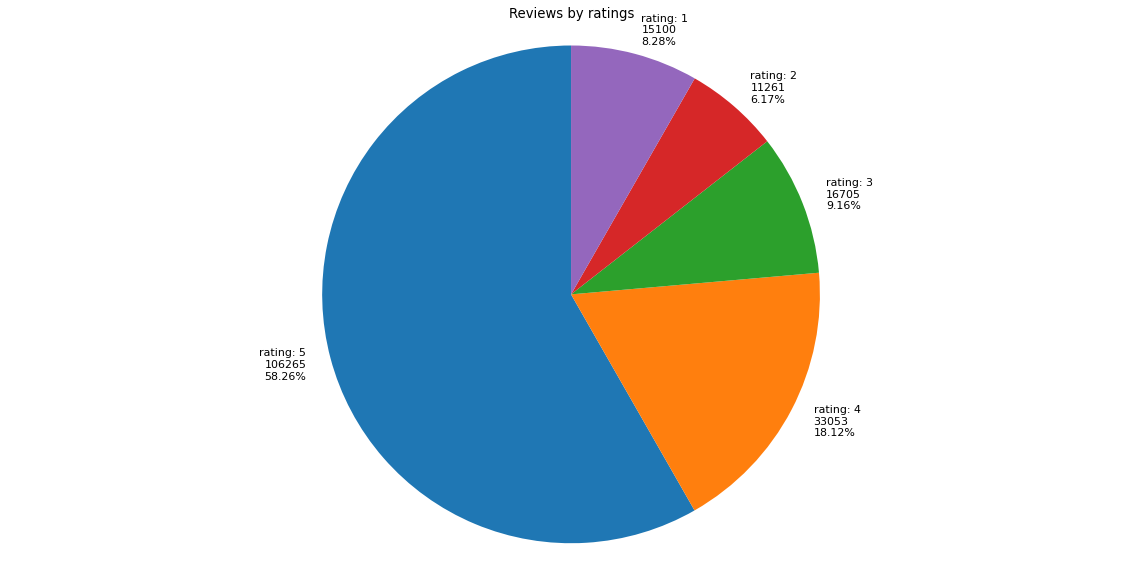

In [28]:
plt.rcParams["figure.figsize"] = (16,8) # width and height of figure is defined in inches
plt.rcParams['font.size'] = 11 # Font size is defined


labs = []      ## labels variable inside ax1.pie takes in list / series. so define empty list here 

## populate 'labs' in below loop for displaying the information on the plot

for i in range(len(ratings_counts)):
    labs.append(('rating: ' + str(ratings_counts.rating.iloc[i]) +'\n' 
                 + str(round(ratings_counts.Counts.iloc[i])) +'\n'
                 + str(ratings_counts.pct.iloc[i]) + '%'))


fig1, ax1 = plt.subplots()


ax1.pie(ratings_counts['Counts'], labels=labs, startangle=90)

fig = plt.gcf()
ax1.axis('equal')  ## equal aspect ration for pie plot circle

plt.tight_layout()

plt.title(f"Reviews by ratings")
plt.show()

In [29]:
## count the number of review comments by each product name
test_df_rating = temp_df_rating.groupby(['name']).count().sort_values('rating', ascending=False)

In [30]:
## Top 20 products by review comments counts to cross verify
test_df_rating.head(20)

,rating
name,
Vulli Sophie the Giraffe Teether,779
Simple Wishes HandsFree Breastpump Bra Pink XSL,560
Infant Optics DXR5 2.4 GHz Digital Video Baby Monitor with Night Vision,558
Baby Einstein Take Along Tunes,545
Cloud b Twilight Constellation Night Light Turtle,517
FisherPrice Booster Seat BlueGreenGray,487
FisherPrice Rainforest Jumperoo,446
Graco Nautilus 3in1 Car Seat Matrix,418
Leachco Snoogle Total Body Pillow,388


In [31]:
## temporary dataframe with rating 5
temp_df_rating_5 = temp_df_rating[temp_df_rating.rating == 5]
temp_df_rating_5.head()

,name,rating
1,Planetwise Wipe Pouch,5
2,Annas Dream Full Quilt with 2 Shams,5
3,Stop Pacifier Sucking without tears with Thumb...,5
4,Stop Pacifier Sucking without tears with Thumb...,5
5,Stop Pacifier Sucking without tears with Thumb...,5


In [32]:
## total number of 5 star ratings / reviews
len(temp_df_rating_5)

106265

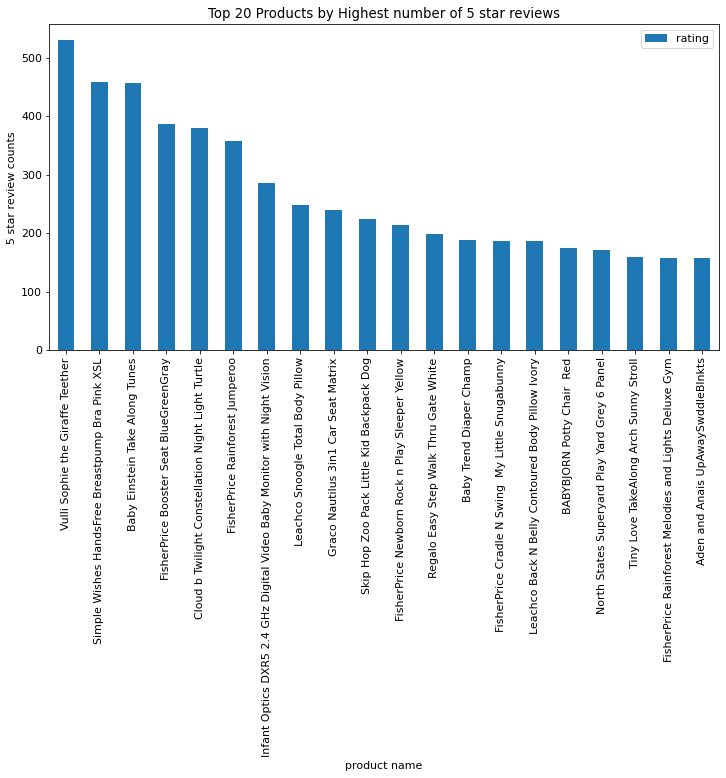

In [33]:
## top 20 products by highest number of 5 star ratings

temp_df_rating_5.groupby(['name']).count().sort_values('rating', ascending=False)[0:20].plot(kind='bar', figsize=(12, 6))
plt.xlabel('product name')
plt.ylabel('5 star review counts')
plt.title('Top 20 Products by Highest number of 5 star reviews')
plt.show()

In [34]:
## temporary dataframe with rating 4
temp_df_rating_4 = temp_df_rating[temp_df_rating.rating == 4]
temp_df_rating_4.head()

,name,rating
6,A Tale of Babys Days with Peter Rabbit,4
9,Baby Trackerreg Daily Childcare Journal Sched...,4
10,Baby Trackerreg Daily Childcare Journal Sched...,4
12,Baby Trackerreg Daily Childcare Journal Sched...,4
15,Natures Lullabies First Year Sticker Calendar,4


In [35]:
## total number of 4 star ratings / reviews
len(temp_df_rating_4)

33053

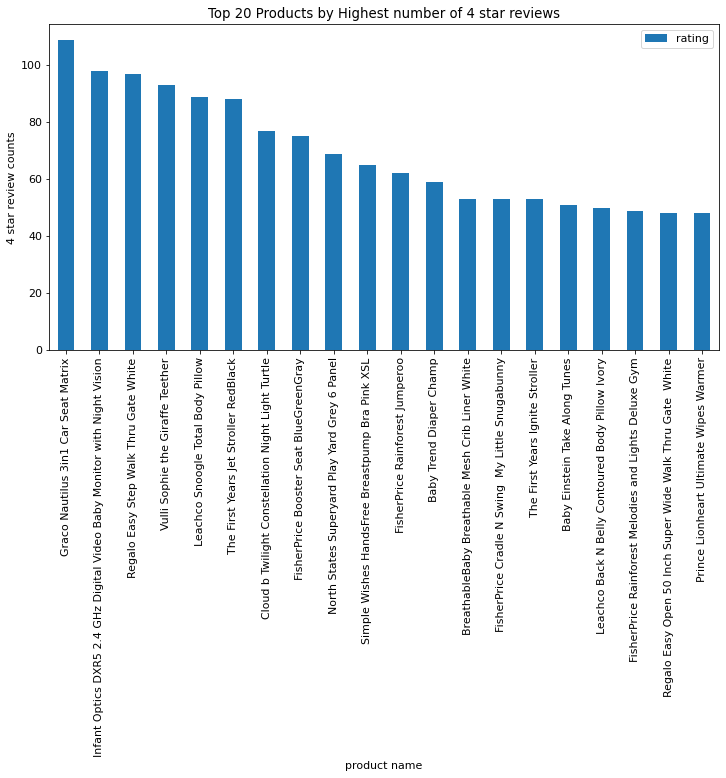

In [36]:
## top 20 products by highest number of 4 star ratings

temp_df_rating_4.groupby(['name']).count().sort_values('rating', ascending=False)[0:20].plot(kind='bar', figsize=(12, 6))
plt.xlabel('product name')
plt.ylabel('4 star review counts')
plt.title('Top 20 Products by Highest number of 4 star reviews')
plt.show()

In [37]:
## temporary dataframe with rating 3
temp_df_rating_3 = temp_df_rating[temp_df_rating.rating == 3]
temp_df_rating_3.head()

,name,rating
0,Planetwise Flannel Wipes,3
13,Baby Trackerreg Daily Childcare Journal Sched...,3
23,Natures Lullabies Second Year Sticker Calendar,3
27,Lamaze Peekaboo I Love You,3
34,Lamaze Peekaboo I Love You,3


In [38]:
## total number of 3 star ratings / reviews
len(temp_df_rating_3)

16705

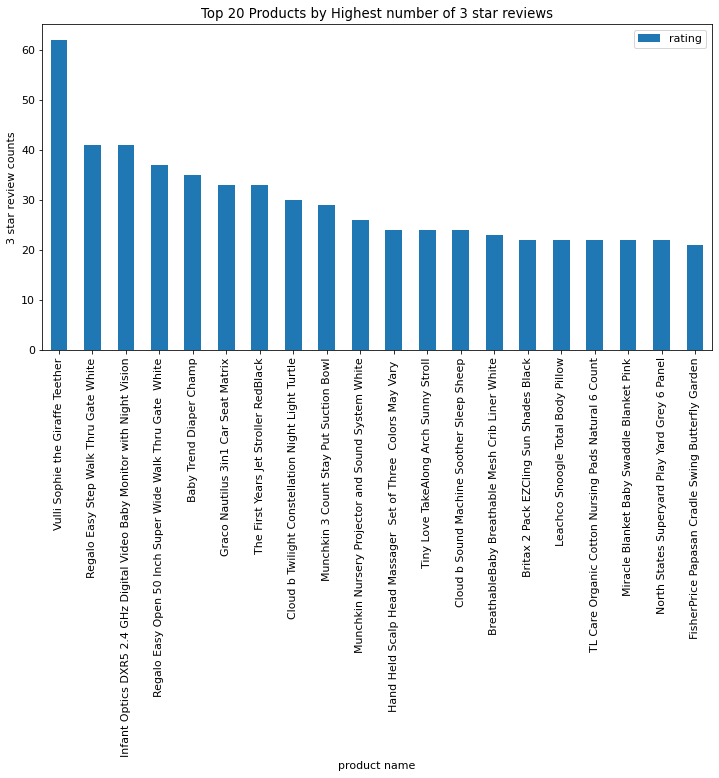

In [39]:
## top 20 products by highest number of 3 star ratings

temp_df_rating_3.groupby(['name']).count().sort_values('rating', ascending=False)[0:20].plot(kind='bar', figsize=(12, 6))
plt.xlabel('product name')
plt.ylabel('3 star review counts')
plt.title('Top 20 Products by Highest number of 3 star reviews')
plt.show()

In [40]:
## temporary dataframe with rating 2
temp_df_rating_2 = temp_df_rating[temp_df_rating.rating == 2]
temp_df_rating_2.head()

,name,rating
21,Natures Lullabies Second Year Sticker Calendar,2
41,SoftPlay Giggle Jiggle Funbook Happy Bear,2
71,Wall Decor Removable Decal Sticker Colorful B...,2
78,Cloth Diaper Pins Stainless Steel Traditional ...,2
80,Cloth Diaper Pins Stainless Steel Traditional ...,2


In [41]:
## total number of 2 star ratings / reviews
len(temp_df_rating_2)

11261

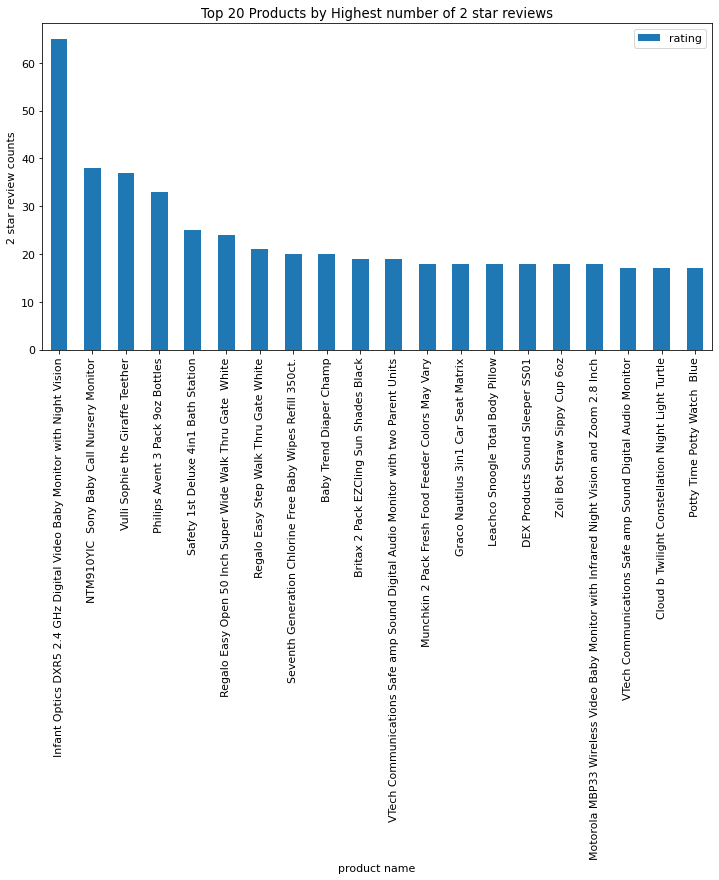

In [42]:
## top 20 products by highest number of 2 star ratings

temp_df_rating_2.groupby(['name']).count().sort_values('rating', ascending=False)[0:20].plot(kind='bar', figsize=(12, 6))
plt.xlabel('product name')
plt.ylabel('2 star review counts')
plt.title('Top 20 Products by Highest number of 2 star reviews')
plt.show()

In [43]:
## temporary dataframe with rating 1
temp_df_rating_1 = temp_df_rating[temp_df_rating.rating == 1]
temp_df_rating_1.head()

,name,rating
50,SoftPlay Cloth Book Love,1
70,Hunntreg Falling Flowers and Birds Kids Nurser...,1
84,Cloth Diaper Pins Stainless Steel Traditional ...,1
90,Super Mario Game Nintendo Wall Sticker and Decal,1
91,New Style Trailing Cherry Blossom Tree Decal R...,1


In [44]:
## total number of 1 star ratings / reviews
len(temp_df_rating_1)

15100

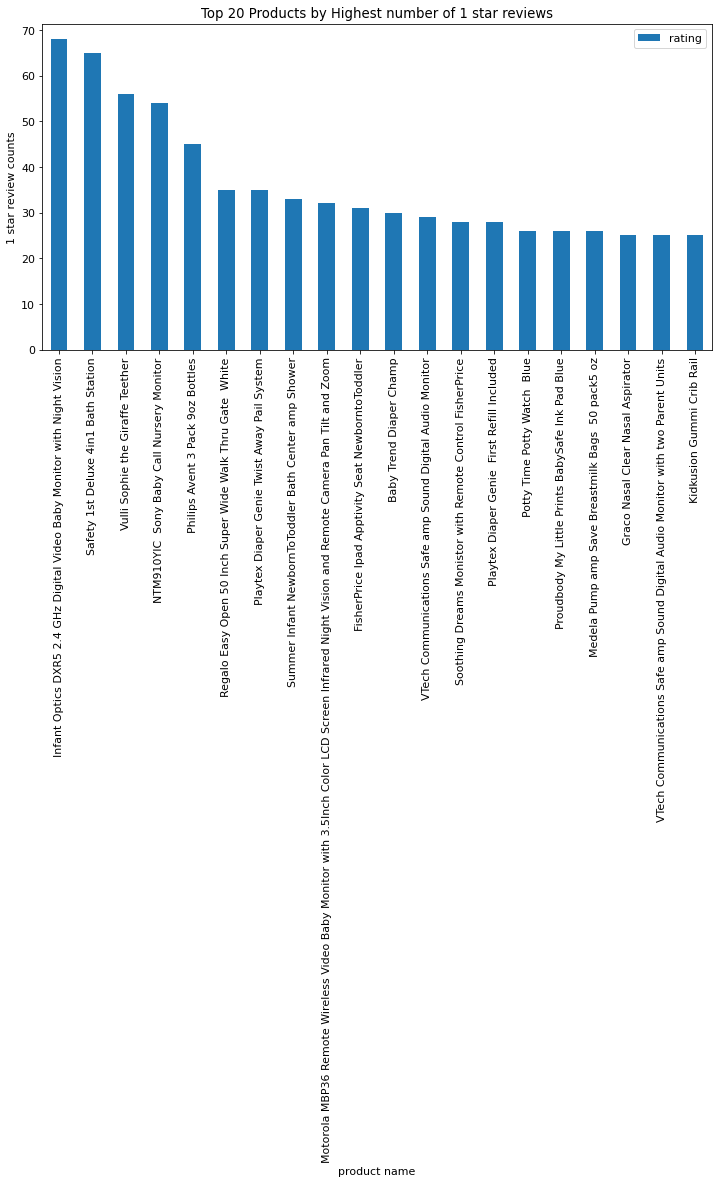

In [45]:
## top 20 products by highest number of 1 star ratings

temp_df_rating_1.groupby(['name']).count().sort_values('rating', ascending=False)[0:20].plot(kind='bar', figsize=(12, 6))
plt.xlabel('product name')
plt.ylabel('1 star review counts')
plt.title('Top 20 Products by Highest number of 1 star reviews')
plt.show()

# =============================================================

# Data Pre-processing prior to modeling

In [46]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [47]:
import nltk

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [48]:
## load required libraries for reviews text processing / sentiment analysis
import random

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [49]:
## We will look to select equal number of records from each rating category to maintain the dataset as balanced dataset.
## For rating category 2, we have least number of reviews - '11261'. So, we will use that as a count for selecting the 
## number of records for each rating category.

In [50]:
# Use random seed for reproducible results
random.seed(0)

## please note rating 3 reviews are treated as neutral and are under-represented in terms of counts.
## hence we are multiplying the number of samples by 2 so that equal reviews numbers are generated.

## SMOTE - Synthetic Minority Oversample Technique

df_1 = df[df.rating==1].sample(11261).copy()
df_2 = df[df.rating==2].sample(11261).copy()
df_3 = df[df.rating==3].sample(11261*2, replace=True).copy()
df_4 = df[df.rating==4].sample(11261).copy()
df_5 = df[df.rating==5].sample(11261).copy()

In [51]:
## Concatenate the data frames by categories into one

reviews_df = pd.concat([df_1, df_2, df_3, df_4, df_5])

In [52]:
reviews_df.shape

(67566, 4)

In [53]:
reviews_df.head()

,name,review,rating,sentiment
181223,Tommee Tippee Bottle 9 Ounce,threading was bad it leaks. base is small easi...,1,negative
26611,Sevi Xylophone Toy,i was looking for a better quality xylophone f...,1,negative
24963,JJ Cole Lite Plain Infant Bundle Me Graphite,i bought one of these for my daughter. i had ...,1,negative
10615,Safety 1st Designer Infant Car Seat Base Black,dont be fooled this base will not work with an...,1,negative
131963,5x8 Vantage Premium Grip Non Slip Rug Pad for ...,i ordered this and the item fit the descriptio...,1,negative


### remove stop words

In [54]:
# Load stop words

stop_words = stopwords.words('english')

In [55]:
# Remove stop words by splitting the text, removing stop words, and then rejoining the text

reviews_df['review_2'] = reviews_df['review'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

### Porter stemmer

In [56]:
# Create a PorterStemmer

porter = PorterStemmer()

In [57]:
reviews_df['review_2'] = reviews_df['review_2'].apply(lambda x: ' '.join([porter.stem(word) for word in x.split()]))

In [58]:
## display randomly selected 10 records after deleting stop_words from the review text

reviews_df.sample(10).head(10)

,name,review,rating,sentiment,review_2
30197,i Play Soft And Snuggly Blanket Pink,i ordered this blanket based on the descriptio...,3,neutral,order blanket base descript review product. gi...
16034,FisherPrice Ocean Wonders Aquarium Bouncer,we already had a combi activity rocker but the...,4,positive,alreadi combi activ rocker toy combi manual me...
122001,Safety 1st Inflatable Spout Guard Refresh,keep in mind before purchasing this gadget do...,3,neutral,keep mind purchas gadget doesnt hole top showe...
7060,Peace of Mind Two 900 Mhz Baby Receivers Monitor,this monitor is awful. my husband i did not r...,1,negative,monitor awful. husband realiz constant static ...
132133,Animals Alphabet Baby Nursery Peel amp Stick W...,these are really cute but they dont seem to ha...,4,positive,realli cute dont seem stick power item purchased.
178238,Baby Brezza Formula Pro One Step Food Maker,this worked for the first month we had it. the...,1,negative,work first month it. sudden instead 2 oz would...
54045,Instant Murals 25 Polka Dot Wall Transfer Stic...,i have not put the dots on the wall yet so i c...,2,negative,put dot wall yet cannot comment qualiti disapp...
33723,Lamaze Play amp Grow Freddie the Firefly Take ...,i bought the firefly and the peacock toy for m...,5,positive,bought firefli peacock toy twin love them.they...
94110,The First Years Jet Stroller RedBlack,for the price you pay for the stroller its not...,2,negative,price pay stroller bad definit feel differ you...
3782,Playtex Diaper Genie First Refill Included,i received this as a shower gift but when the ...,1,negative,receiv shower gift time came use didnt work li...


# Model preparation and evaluation

In [59]:
## import required libraries for sklearn MLP classifier and mode evaluation

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.neural_network import MLPClassifier

In [60]:
## import required libraries for Keras Neural network classifier and mode evaluation

import keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

### Tfidf vectorizer

In [61]:
# Create text data variable to feed into vectorizer to prepare words list in matrix format

text = np.array(reviews_df['review_2'])

In [62]:
# Initialize Vectorizer

vectorizer = TfidfVectorizer()

In [63]:
# Fit Vectorizer

X = vectorizer.fit_transform(text)
y = reviews_df.sentiment

In [64]:
# Use encoder to convert categories to numerical values, 
## since Keras Neural network requires numerical output values.

encoder = LabelEncoder()

y=encoder.fit_transform(y)

## these encoded values of 'y' will be used as is later on for CountVectorizer section as well

In [65]:
# Create train and test split with 75% train data and 25% test data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [66]:
# Check the shape of X_train, X_test, y_train, and y_test. Use number of features in X_train or X_test to set N_FEATURES 

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(50674, 51934)
(16892, 51934)
(50674,)
(16892,)


## MLP classifier within sklearn using Tfidf vectorizer

In [67]:
# Prepare MLP Classifier

mlp = MLPClassifier(hidden_layer_sizes=(100, 100, 100))
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(100, 100, 100))

In [68]:
# Prepare predictions

predictions = mlp.predict(X_test)

In [69]:
# Prepare confusion matrix

print(confusion_matrix(y_test, predictions))

[[3915 1028  556]
 [ 810 4259  571]
 [ 758  929 4066]]


In [70]:
# Print Classification Report

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.71      0.71      0.71      5499
           1       0.69      0.76      0.72      5640
           2       0.78      0.71      0.74      5753

    accuracy                           0.72     16892
   macro avg       0.73      0.72      0.72     16892
weighted avg       0.73      0.72      0.73     16892



In [71]:
# Calculate Accuracy Score

#print(accuracy_score(y_test, predictions))

acc = accuracy_score(y_test, predictions)

In [72]:
print("sklearn MLP accuracy score using TfIdf vectorizer is: ", round(acc*100, 2), '%')

sklearn MLP accuracy score using TfIdf vectorizer is:  72.46 %


## Keras Neural Network classifier using Tf-idf vectorizer

In [73]:
## create arrays for y_train and y_test

y_train = np.asarray(y_train)
y_test  = np.asarray(y_test)

In [74]:
## Check the shape of X_train, X_test, y_train, and y_test. Use number of features in X_train or X_test to set N_FEATURES 

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(50674, 51934)
(16892, 51934)
(50674,)
(16892,)


In [75]:
## Set features and classes

N_FEATURES = X_train.shape[1]
N_CLASSES = 3

In [76]:
## Define function to convert sparse matrix to sparse tensor
## The number of features is huge and it is sparse matrix. so have to use a SparseTensor or else it is too slow.
## https://stackoverflow.com/questions/40896157/scipy-sparse-csr-matrix-to-tensorflow-sparsetensor-mini-batch-gradient-descent

def conv_sparse_matrix_to_sparse_tensor(X):
    coo = X.tocoo()
    indices = np.mat([coo.row, coo.col]).transpose()
    return tf.sparse.reorder(tf.SparseTensor(indices, coo.data, coo.shape))

In [77]:
## Prepare train and test data Sparse Tensor 

X_train = conv_sparse_matrix_to_sparse_tensor(X_train)
X_test = conv_sparse_matrix_to_sparse_tensor(X_test)

In [78]:
## Create keras sequential classifier

nn = Sequential()
nn.add(Dense(600, activation='relu', input_shape=(N_FEATURES,)))
nn.add(Dense(900, activation='relu'))
nn.add(Dense(N_CLASSES, activation='softmax'))

In [79]:
## Compile the Artificial Neural Network

nn.compile(loss='sparse_categorical_crossentropy', 
           optimizer='adam', 
           metrics=['accuracy'])

In [80]:
## fit ANN to the training set

nn.fit(X_train, y_train, batch_size=500, epochs=5, verbose=1)

Epoch 1/5
102/102 [==============================] - 14s 135ms/step - loss: 0.7990 - accuracy: 0.6368
Epoch 2/5
102/102 [==============================] - 14s 133ms/step - loss: 0.4690 - accuracy: 0.8180
Epoch 3/5
102/102 [==============================] - 14s 132ms/step - loss: 0.2045 - accuracy: 0.9316
Epoch 4/5
102/102 [==============================] - 13s 130ms/step - loss: 0.0538 - accuracy: 0.9851
Epoch 5/5
102/102 [==============================] - 13s 132ms/step - loss: 0.0112 - accuracy: 0.9981


In [81]:
# create predictions

y_pred = np.argmax(nn.predict(X_test), axis=-1)

In [82]:
## confusion matrix for test predictions

print(confusion_matrix(y_test, y_pred))

[[4023  884  592]
 [ 835 4184  621]
 [ 734  818 4201]]


In [83]:
## classification report for test predictions

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.73      0.73      5499
           1       0.71      0.74      0.73      5640
           2       0.78      0.73      0.75      5753

    accuracy                           0.73     16892
   macro avg       0.74      0.73      0.73     16892
weighted avg       0.74      0.73      0.73     16892



In [84]:
## accuracy score for the test predictions

##print(accuracy_score(y_test, y_pred))

acc = accuracy_score(y_test, y_pred)

In [85]:
print("Keras neural network accuracy score using Tfidf vectorizer is: ", round(acc*100, 2), '%')

Keras neural network accuracy score using Tfidf vectorizer is:  73.45 %


## =========================================================

### N-gram analysis for modeling - Multinomial Naive Bayes

**ref: https://towardsdatascience.com/leveraging-n-grams-to-extract-context-from-text-bdc576b47049**

In [86]:
# import libraries
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import f1_score

In [87]:
# Fit Vectorizer

X_temp = list(reviews_df['review_2'])
y_temp = list(y)

## y is converted to numeric values using label encoder earlier. So, it will be used as is here.

In [88]:
# Create train and test split with 75% train data and 25% test data

X_train, X_test, y_train, y_test = train_test_split(X_temp, y_temp, test_size=0.25, random_state=0)

In [89]:
# train model with different n-gram ranges
for N in range(1, 5):
    
    # convert training data to bag of words
    cv = CountVectorizer(analyzer = 'word', ngram_range=(1,N), stop_words='english')
    X_train_cv = cv.fit_transform(X_train)
    X_test_cv = cv.transform(X_test)
    
    # train model and generate predictions
    clf = MultinomialNB()
    clf.fit(X_train_cv, y_train)
    y_pred = clf.predict(X_test_cv)
    
    # compute f-1 score
    #score = f1_score(y_test, y_pred, average='micro'),
    #print('F-1 score of model with n-gram range of {}: {}'.format((1,N), np.round(score), 2))
    
    # compute accuracy score
    acc_score = np.round(accuracy_score(y_test, y_pred), 2)
    print('Accuracy score of model with n-gram range of {}: {}'.format((1,N), acc_score))

Accuracy score of model with n-gram range of (1, 1): 0.64
Accuracy score of model with n-gram range of (1, 2): 0.72
Accuracy score of model with n-gram range of (1, 3): 0.72
Accuracy score of model with n-gram range of (1, 4): 0.72


**Based on above observation, we can see the accuracy tends to remain constant beyond 2 gram count vectorizer. So, we will use bi-gram count vectorizer for the final modeling purpose**

## =========================================================

### Count vectorizer - check LabelEncoder - numeric y variable values are needed

In [90]:
# Initialize Vectorizer

vectorizer = CountVectorizer(analyzer = 'word', ngram_range=(1,2), stop_words='english')

In [91]:
# Fit Vectorizer

X = vectorizer.fit_transform(reviews_df['review_2'])

## y is converted to numeric values using label encoder earlier. So, it will be used as is here.

In [92]:
# Create train and test split with 75% train data and 25% test data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [93]:
# Check the shape of X_train, X_test, y_train, and y_test. Use number of features in X_train or X_test to set N_FEATURES 

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(50674, 976019)
(16892, 976019)
(50674,)
(16892,)


## MLP classifier with sklearn - Count vectorizer

In [94]:
# Prepare MLP Classifier

mlp = MLPClassifier(hidden_layer_sizes=(100, 100, 100))
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(100, 100, 100))

In [95]:
# Prepare predictions

predictions = mlp.predict(X_test)

In [96]:
# Prepare confusion matrix

print(confusion_matrix(y_test, predictions))

[[4125  781  593]
 [ 830 4145  665]
 [ 609  614 4530]]


In [97]:
# Print Classification Report

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.74      0.75      0.75      5499
           1       0.75      0.73      0.74      5640
           2       0.78      0.79      0.79      5753

    accuracy                           0.76     16892
   macro avg       0.76      0.76      0.76     16892
weighted avg       0.76      0.76      0.76     16892



In [98]:
# Calculate Accuracy Score

#print(accuracy_score(y_test, predictions))

acc = accuracy_score(y_test, predictions)

In [99]:
print("sklearn MLP accuracy score using Count vectorizer is: ", round(acc*100, 2), '%')

sklearn MLP accuracy score using Count vectorizer is:  75.78 %


## Neural Classifiers with keras / tensorflow

In [100]:
# Use encoder to convert categories to numerical values, 
## since Keras Neural network requires numerical output values.

#encoder = LabelEncoder()

#cat = reviews_df['sentiment']
#reviews_df['cat']=encoder.fit_transform(cat)
#reviews_df.cat.value_counts()

In [101]:
# Initialize Vectorizer

#vectorizer = CountVectorizer()

In [102]:
# Fit Vectorizer

#X = vectorizer.fit_transform(reviews_df['review_2'])
#y = reviews_df['cat']

In [103]:
# Create train and test split with 75% size for train data and 25% size for test data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [104]:
# Convert y_train and y_test as arrays

y_train = np.asarray(y_train)
y_test = np.asarray(y_test)

In [105]:
# Check the shape of X_train, X_test, y_train, and y_test. Use number of features in X_train or X_test to set N_FEATURES 

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(50674, 976019)
(16892, 976019)
(50674,)
(16892,)


In [106]:
## Set features and classes

N_FEATURES = X_train.shape[1]
N_CLASSES = 3

In [107]:
## Define function to convert sparse matrix to sparse tensor
## The number of features is huge and it is sparse matrix. so have to use a SparseTensor or else it is too slow.
## https://stackoverflow.com/questions/40896157/scipy-sparse-csr-matrix-to-tensorflow-sparsetensor-mini-batch-gradient-descent

def conv_sparse_matrix_to_sparse_tensor(X):
    coo = X.tocoo()
    indices = np.mat([coo.row, coo.col]).transpose()
    return tf.sparse.reorder(tf.SparseTensor(indices, coo.data, coo.shape))

In [108]:
## Prepare train and test data Sparse Tensor 

X_train = conv_sparse_matrix_to_sparse_tensor(X_train)
X_test = conv_sparse_matrix_to_sparse_tensor(X_test)

In [109]:
## Create keras sequential classifier

nn = Sequential()
nn.add(Dense(600, activation='relu', input_shape=(N_FEATURES,)))
nn.add(Dense(900, activation='relu'))
nn.add(Dense(N_CLASSES, activation='softmax'))

In [110]:
## Compile the Artificial Neural Network

nn.compile(loss='sparse_categorical_crossentropy', 
           optimizer='adam', 
           metrics=['accuracy'])

In [111]:
## fit ANN to the training set

nn.fit(X_train, y_train, batch_size=500, epochs=5, verbose=1)

Epoch 1/5
102/102 [==============================] - 309s 3s/step - loss: 0.7113 - accuracy: 0.6889
Epoch 2/5
102/102 [==============================] - 304s 3s/step - loss: 0.0367 - accuracy: 0.9885
Epoch 3/5
102/102 [==============================] - 291s 3s/step - loss: 0.0027 - accuracy: 0.9996
Epoch 4/5
102/102 [==============================] - 295s 3s/step - loss: 6.8711e-04 - accuracy: 0.9998
Epoch 5/5
102/102 [==============================] - 294s 3s/step - loss: 3.1997e-04 - accuracy: 0.9999


In [112]:
# create predictions

y_pred = np.argmax(nn.predict(X_test), axis=-1)

In [113]:
## confusion matrix for test predictions

print(confusion_matrix(y_test, y_pred))

[[4356  529  614]
 [ 945 3979  716]
 [ 740  383 4630]]


In [114]:
## classification report for test predictions

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.79      0.75      5499
           1       0.81      0.71      0.76      5640
           2       0.78      0.80      0.79      5753

    accuracy                           0.77     16892
   macro avg       0.77      0.77      0.77     16892
weighted avg       0.77      0.77      0.77     16892



In [115]:
## accuracy score for the test predictions

##print(accuracy_score(y_test, y_pred))

acc = accuracy_score(y_test, y_pred)

In [116]:
print("Keras neural network accuracy score using Count vectorizer is: ", round(acc*100, 2), '%')

Keras neural network accuracy score using Count vectorizer is:  76.75 %


## ======================================================================

## Textblob for sentiment analysis

### reference: https://towardsdatascience.com/my-absolute-go-to-for-sentiment-analysis-textblob-3ac3a11d524

In [117]:
pip install textblob

  Using cached textblob-0.17.1-py2.py3-none-any.whl (636 kB)
Note: you may need to restart the kernel to use updated packages.


In [118]:
from textblob import TextBlob

In [119]:
## Create a function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity


## Create a function to get the polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

## create a function to convert polarity score into sentiment
def getAnalysis(score):
    if score < 0:
        return 'negative'
    elif score == 0:
        return 'neutral'
    else:
        return 'positive'

## Create two new columns ‘Subjectivity’ & ‘Polarity’
reviews_df['textblob_Subjectivity'] = reviews_df['review'].apply(getSubjectivity)
reviews_df['textblob_Polarity']     = reviews_df['review'].apply(getPolarity)

## create a new column to store the sentiment, identified using textblob analysis    
reviews_df['textblob_sentiment'] = reviews_df['textblob_Polarity'].apply(getAnalysis )

reviews_df.sample(10).head(10)

,name,review,rating,sentiment,review_2,textblob_Subjectivity,textblob_Polarity,textblob_sentiment
145556,Kids Line Musical Mobile Sweet Dreams,i got a discount because it had been opened an...,2,negative,got discount open box torn. say miss part miss...,0.566667,0.206667,positive
96074,Groovy Pink Peace Sign Window Treatment Panels...,my 7 year old daughter loves pink. the design ...,4,positive,7 year old daughter love pink. design one grow...,0.587500,0.156250,positive
156502,Skip Hop Memory Foam Stroller Liner Blue,doesnt exactly fit my valco stroller should ha...,3,neutral,doesnt exactli fit valco stroller look purchas...,0.500000,0.450000,positive
100169,Infantino Wrap and Tie Baby Carrier Black Blue...,ive tried multiple carriers with my son and th...,4,positive,ive tri multipl carrier son one last one bough...,0.420833,0.038889,positive
60213,Tiny Love Sweet Island Dreams Mobile,if you have anything fancier than a bare bones...,1,negative,anyth fancier bare bone crib one convert toddl...,0.511111,0.047222,positive
83126,green sprouts Favorite Food Bib Red Milk,i do love these favorite good bibs and have se...,2,negative,love favorit good bib sever them. howev im dis...,0.458621,0.096567,positive
121835,Disney Toy Story LED LightUp Decorative Pillow,this is not what i thought i was getting. the...,1,negative,thought getting. led part tini littl light. th...,0.566667,0.070833,positive
130805,Motorola Digital Audio Baby Monitor with Room ...,had this monitor for almost a year. unplugged ...,1,negative,monitor almost year. unplug base unit accident...,0.393750,-0.212500,negative
2169,Philips Avent 3 Pack 9oz Bottles,i bought this at babies r us. love the bottle...,2,negative,bought babi r us. love bottl leak. need correc...,0.632413,0.117641,positive
104298,Snoogle Chic Total Body Pillow,i have not used any other pregnancy body pillo...,4,positive,use pregnanc bodi pillow say one super comfort...,0.608333,0.021667,positive


In [120]:
print(classification_report(reviews_df.sentiment, reviews_df.textblob_sentiment))

              precision    recall  f1-score   support

    negative       0.62      0.33      0.43     22522
     neutral       0.29      0.02      0.04     22522
    positive       0.39      0.93      0.55     22522

    accuracy                           0.43     67566
   macro avg       0.43      0.43      0.34     67566
weighted avg       0.43      0.43      0.34     67566



In [121]:
acc = accuracy_score(reviews_df.sentiment, reviews_df.textblob_sentiment)

In [122]:
print("textblob accuracy score is: ", round(acc*100, 2), '%')

textblob accuracy score is:  42.61 %


## Recurrent Neural Network (RNN)

### reference: https://analyticsindiamag.com/how-to-implement-lstm-rnn-network-for-sentiment-analysis/

In [123]:
## import required libraries
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils.np_utils import to_categorical

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

In [124]:
rnn_df = reviews_df[['review', 'sentiment']]
rnn_df.head()

,review,sentiment
181223,threading was bad it leaks. base is small easi...,negative
26611,i was looking for a better quality xylophone f...,negative
24963,i bought one of these for my daughter. i had ...,negative
10615,dont be fooled this base will not work with an...,negative
131963,i ordered this and the item fit the descriptio...,negative


### label encoder for sentiment column values

In [125]:
from sklearn.preprocessing import LabelEncoder

Le = LabelEncoder()

y = Le.fit_transform(rnn_df['sentiment'])

In [126]:
## store the sentiments in the labels as a list

labels = y
labels[:5]

array([0, 0, 0, 0, 0])

In [127]:
## store the reviews in the texts as a list

texts = rnn_df['review'].to_list()
texts[:5]

['threading was bad it leaks. base is small easily tips over. basically it is junk. dont bother to buy it.',
 'i was looking for a better quality xylophone for my kids who are really into music  and i am not happy with my choice.  i wanted to avoid the tinny sounds of a cheap version but this one doesnt cut the mustard.  2 notes are the same and the tone is poor.  pretty to look at but i wouldnt recommend this for the money.',
 'i bought one of these for my daughter.  i had it in the car seat when we left the hospital.  the nurses made me take it out.  they wouldnt let her leave the hospital with it.  they said it wasnt safe to use.  they said the it doesnt allow the seatbelt straps to lay properly over the babys shoulders making it unsafe.  i wish i would have known this before i bought it.',
 'dont be fooled this base will not work with any eddie bauer car seat. i have the trailmaker travel system and this base didnt fit the infant car seat.',
 'i ordered this and the item fit the de

## Check if the words selected can be the most useful / used words and sort based on that. that could help to improve model accuracy

In [128]:
maxlen = 400          ## cut the reviews after 400 words
max_features = 40000  ## consider the top 40000 words in the dataset
embedding_dim = 400   ## dimensional vector for the word index built during tokenization

In [129]:
## tokenizing the product reviews

tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

data = pad_sequences(sequences, maxlen=maxlen)

labels = np.asarray(labels)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

Found 57074 unique tokens.
Shape of data tensor: (67566, 400)
Shape of label tensor: (67566,)


In [130]:
# Split the data into a training set and a validation set
# But first, shuffle the data, since we started from data
# where sample are ordered (all negative first, then all positive).

rec_count = data.shape[0]
print("total record count: ", rec_count)

## random shuffle all the data records prior to train / test split.
## this will ensure that we have variety of data in train / test datasets.
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

## for training will use 70% data and testing will use remainder 30%
x_train = data[:int(rec_count*0.75)]
y_train = labels[:int(rec_count*0.75)]
x_val = data[int(rec_count*0.75): ]
y_val = labels[int(rec_count*0.75): ]

## display the train and test data sizes
print('x_train, y_train shape: ', x_train.shape, y_train.shape)
print('x_val, y_val shape: ', x_val.shape, y_val.shape)

total record count:  67566
x_train, y_train shape:  (50674, 400) (50674,)
x_val, y_val shape:  (16892, 400) (16892,)


## LSTM Model 

### model definition

In [131]:
## LSTM model

from keras.layers import LSTM

model = Sequential()
model.add(Embedding(max_features, 400))
model.add(LSTM(400))
model.add(Dense(3, activation='softmax'))     ## last layer - 3 - number of classes

model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',  ## loss function for more than 2 output classes
              metrics=['acc'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 400)         16000000  
_________________________________________________________________
lstm (LSTM)                  (None, 400)               1281600   
_________________________________________________________________
dense_6 (Dense)              (None, 3)                 1203      
Total params: 17,282,803
Trainable params: 17,282,803
Non-trainable params: 0
_________________________________________________________________


In [132]:
## model fitting

history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=1600,
                    validation_data=(x_val, y_val))

Epoch 1/10
32/32 [==============================] - 380s 12s/step - loss: 1.0385 - acc: 0.4827 - val_loss: 0.9087 - val_acc: 0.5729
Epoch 2/10
32/32 [==============================] - 365s 11s/step - loss: 0.9069 - acc: 0.5947 - val_loss: 0.8714 - val_acc: 0.5911
Epoch 3/10
32/32 [==============================] - 363s 11s/step - loss: 0.8087 - acc: 0.6421 - val_loss: 0.8081 - val_acc: 0.6180
Epoch 4/10
32/32 [==============================] - 361s 11s/step - loss: 0.7560 - acc: 0.6717 - val_loss: 0.8547 - val_acc: 0.6040
Epoch 5/10
32/32 [==============================] - 360s 11s/step - loss: 0.7114 - acc: 0.6998 - val_loss: 0.8553 - val_acc: 0.6074
Epoch 6/10
32/32 [==============================] - 361s 11s/step - loss: 0.6586 - acc: 0.7261 - val_loss: 0.7765 - val_acc: 0.6554
Epoch 7/10
32/32 [==============================] - 359s 11s/step - loss: 0.6494 - acc: 0.7401 - val_loss: 0.7621 - val_acc: 0.6685
Epoch 8/10
32/32 [==============================] - 359s 11s/step - loss: 0.

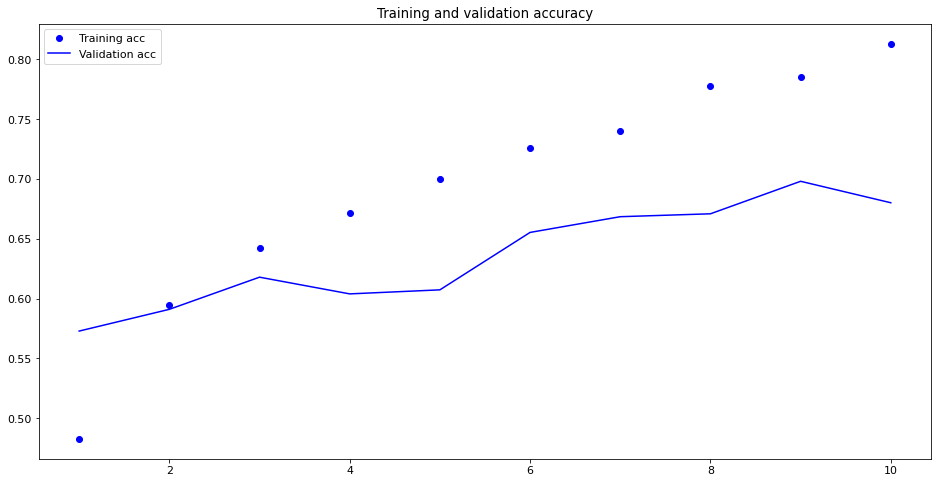

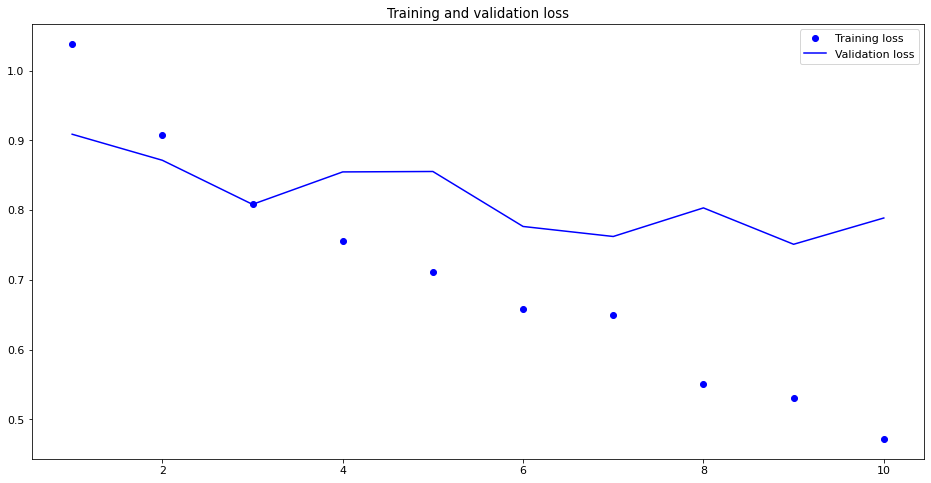

In [133]:
## Plotting the results

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

**As it can be observed, LSTM model training accuracy goes up to 81% during 10 epochs. However, validations accuracy hovers around 68% - 69% for the 10 epochs.**

# ================================================

In [134]:
# ## 1D Convnet model - train and evaluate
# from keras import layers
# from keras.optimizers import RMSprop

# model1 = Sequential()
# model1.add(layers.Embedding(max_features, 800, input_length=maxlen))
# model1.add(layers.Conv1D(32, 7, activation='relu'))
# model1.add(layers.MaxPooling1D(5))
# model1.add(layers.Conv1D(32, 7, activation='relu'))
# model1.add(layers.GlobalMaxPooling1D())
# model1.add(layers.Dense(3))                         ## number of output classes

# model1.summary()

# model1.compile(optimizer=RMSprop(lr=1e-4),
#               loss='sparse_categorical_crossentropy',
#               metrics=['acc'])

# history = model1.fit(x_train, y_train,
#                     epochs=5,
#                     batch_size=800,
#                     validation_split=0.25)